# Symbolic

In [9]:
import sympy as sp
from sympy.abc import x

In [51]:
import matplotlib.pyplot as plt

In [14]:
y = sp.Function('y')
y

y

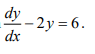

In [81]:
eq = sp.Eq(sp.diff(y(x),x)-2*y(x),6)
eq

Eq(-2*y(x) + Derivative(y(x), x), 6)

In [82]:
sol = sp.dsolve(eq, y(x))
sol

Eq(y(x), C1*exp(2*x) - 3)

In [83]:
ics = {y(0): 0}

In [84]:
c = sp.solve(sol.subs(x, 0).subs(ics), sp.symbols('C1'))
c

[3]

In [85]:
sol_with_ics = sol.subs(sp.symbols('C1'),c[0])
sol_with_ics

Eq(y(x), 3*exp(2*x) - 3)

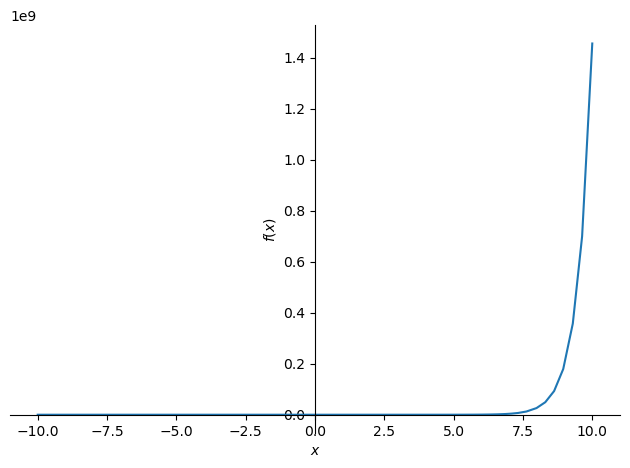

In [86]:
sp.plot(sol_with_ics.rhs)

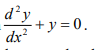

In [52]:
eq = sp.Eq(y(x).diff(x, x) + y(x), 0)
eq

Eq(y(x) + Derivative(y(x), (x, 2)), 0)

In [58]:
sol = sp.dsolve(eq, y(x))
sol

Eq(y(x), C1*sin(x) + C2*cos(x))

In [61]:
A, B = sp.symbols('A B')
initial_conditions = {sp.Eq(y(0), A), sp.Eq(y(x).diff(x).subs(x, 0), B)}

In [64]:
sol = sp.dsolve(eq, y(x), ics={y(0): 1, y(x).diff(x, 1).subs(x, 0): 1})
sol

Eq(y(x), sin(x) + cos(x))

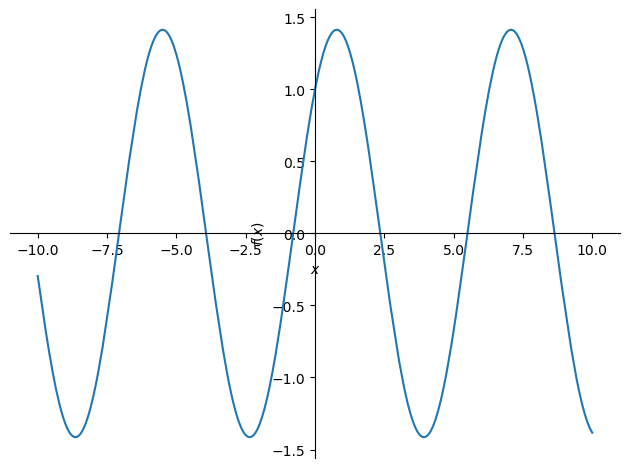

In [67]:
sp.plot(sol.rhs)

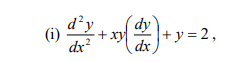

In [68]:
eq = sp.Eq(y(x).diff(x,2)+x*y(x)*y(x).diff(x)+y(x),2)
eq

Eq(x*y(x)*Derivative(y(x), x) + y(x) + Derivative(y(x), (x, 2)), 2)

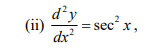

In [72]:
eq = sp.Eq(y(x).diff(x,2),sp.sec(x)**2)
eq

Eq(Derivative(y(x), (x, 2)), sec(x)**2)

In [75]:
sol = sp.dsolve(eq,y(x),ics={y(0): 1, y(x).diff(x, 1).subs(x, 0): 1})
sol

Eq(y(x), x - log(cos(x)) + 1)

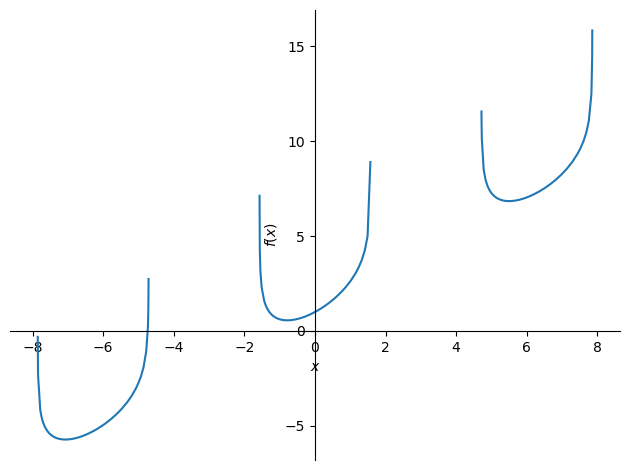

In [76]:
sp.plot(sol.rhs)

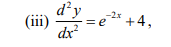

In [77]:
eq = sp.Eq(y(x).diff(x,2),sp.exp(-2*x)+4)
eq

Eq(Derivative(y(x), (x, 2)), 4 + exp(-2*x))

In [79]:
sol = sp.dsolve(eq,y(x),ics={y(0): 1, y(x).diff(x, 1).subs(x, 0): 1})
sol

Eq(y(x), 2*x**2 + 3*x/2 + 3/4 + exp(-2*x)/4)

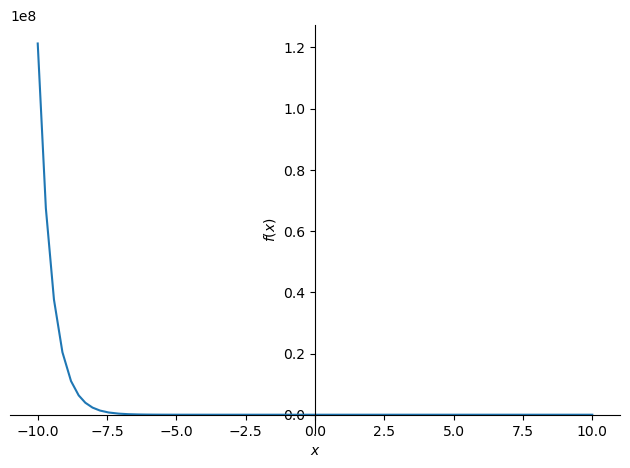

In [80]:
sp.plot(sol.rhs)

# Numeric

In [87]:
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go

$\frac{d}{dx} y(x) = -2y(x)$

In [88]:
def model(y, x):
    return -2 * y

In [94]:
y0 = [0.0,1.0,2.0]

In [95]:
x = np.linspace(0, 5, 100)

In [96]:
y = odeint(model, y0, x)

In [98]:
y.shape

(100, 3)

In [100]:
trace1 = go.Scatter(x=x, y=y[:, 0], mode='lines', name='y0 = 0.0')
trace2 = go.Scatter(x=x, y=y[:, 1], mode='lines', name='y0 = 1.0')
trace3 = go.Scatter(x=x, y=y[:, 2], mode='lines', name='y0 = 2.0')

fig = go.Figure(data = [trace1, trace2, trace3])

fig.update_layout(title='Numerical Solution of dy/dx = -2y', xaxis_title='x', yaxis_title='y', showlegend=True)
fig.show()

In [101]:
def model(y, x):
    return (np.sin(x) - np.exp(2 * x) * y) / np.exp(y)

In [118]:
y0 = 0.0

In [119]:
x = np.linspace(0,5,100)

In [120]:
y = odeint(model, y0, x)

In [121]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y[:, 0], mode='lines', name='Solution'))

fig.update_layout(
    title='Numerical Solution of e^y * dy/dx + e^(2x) * y = sin(x)',
    xaxis_title='x',
    yaxis_title='y',
    showlegend=True,
)

fig.show()

In [122]:
def model(y, x):
    return -y**2 / x